# Analiza sezonu 2020/2021 piłkarskiej ligi angielskiej.

# Pytania badawcze:
	- Procentowy udział zawodników według 10 najczęściej wystepujących narodowości
    - Liczba wykonanych podań według klubu
    - Procentowy udział dokładnych podań według klubu
    - Piłkarze, którzy wykonali najwięcej podań
    - Procent grających zawodników, według przedziałów wiekowych
    - Zawodnicy z największą ilością żółtych kartek oraz ilość czerwonych kartek tych zawodników
    - Najcześciej występujący wiek u piłkarzy
    - Top 20 piłkarzy, którzy zaliczyli łącznie najwięcej goli i asyst
    - Piłkarze z najwyższym współczynnikiem bramek na mecz
    - Korelacja pomiędzy wiekiem, ilością meczy, rozegranych meczy od początku, minut na boisku oraz sumą goli i asyst

# Dane pochodzą z tego linku - https://www.kaggle.com/datasets/rajatrc1705/english-premier-league202021

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pl = pd.read_csv('EPL_20_21.csv')
pl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


# W zbiorze nie znajdują się żadne dane typu NaN

In [5]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

# Wybrane miary dotyczące całego zbioru

In [6]:
pl.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [7]:
pl.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

# 1. Procentowy udział zawodników według 10 najczęściej wystepujących narodowości

In [8]:
nat = pl.groupby('Nationality').count()
nat = nat.iloc[:,0]
nat = nat.to_frame()
nat.rename(columns={'Name':'Count'}, inplace=True)
nat = nat.sort_values(by='Count', ascending=False)
nat = nat.head(10)
nat

,Count
Nationality,
ENG,192
FRA,31
BRA,27
ESP,26
IRL,21
POR,21
SCO,20
NED,16
WAL,12


In [9]:
def func(pct):
  return "{:1.1f}%".format(pct)

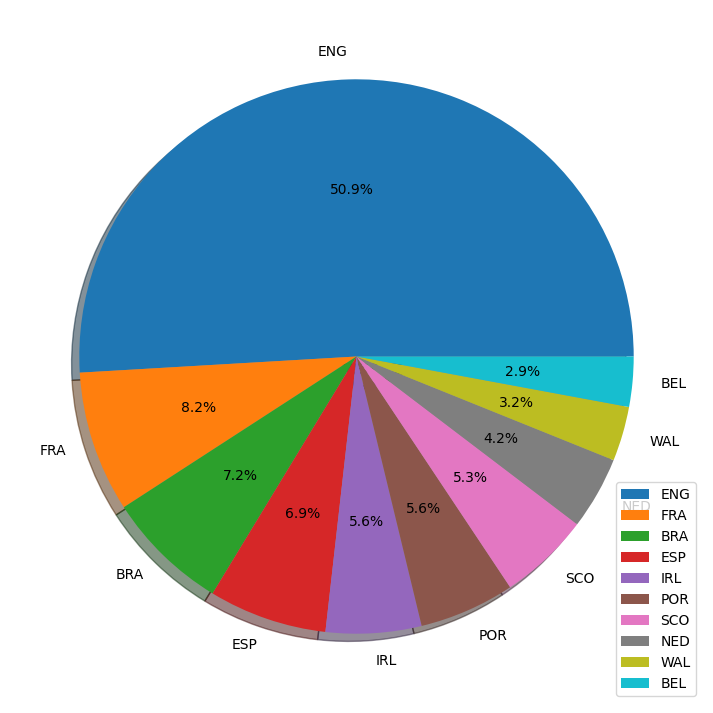

In [10]:
plt.figure(figsize=(16,9))
plt.pie(nat.Count, labels=nat.index, autopct=lambda pct: func(pct), shadow=True)
plt.legend()
plt.show()

# Powyższy wykres przedstawia procentowy udział zawodników z 10 najczęściej występujących narodowści względem siebie. Ponad połowa z tych piłkarzy jest narodowości angielskiej. Drugą najliczniejszą narodowością są Francuzi, a trzecią Brazylia. Całe Zjednoczone Królestwo, wliczając Szkocję i Walię, zajmuję ponad 60 procent wszystkich zawodników.

# 2. Liczba wykonanych podań według klubu

In [11]:
pas = pl.groupby('Club').sum()['Passes_Attempted']
pas = pas.to_frame()
pas = pas.sort_values(by='Passes_Attempted', ascending=False)
pas

/var/folders/fs/1036crms2yncw88yg9r3fpk80000gn/T/ipykernel_11962/2235578288.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pas = pl.groupby('Club').sum()['Passes_Attempted']


,Passes_Attempted
Club,
Manchester City,26688
Liverpool FC,25526
Chelsea,25151
Manchester United,21960
Arsenal,21291
Leicester City,20572
Leeds United,20043
Tottenham Hotspur,19872
Brighton,19456


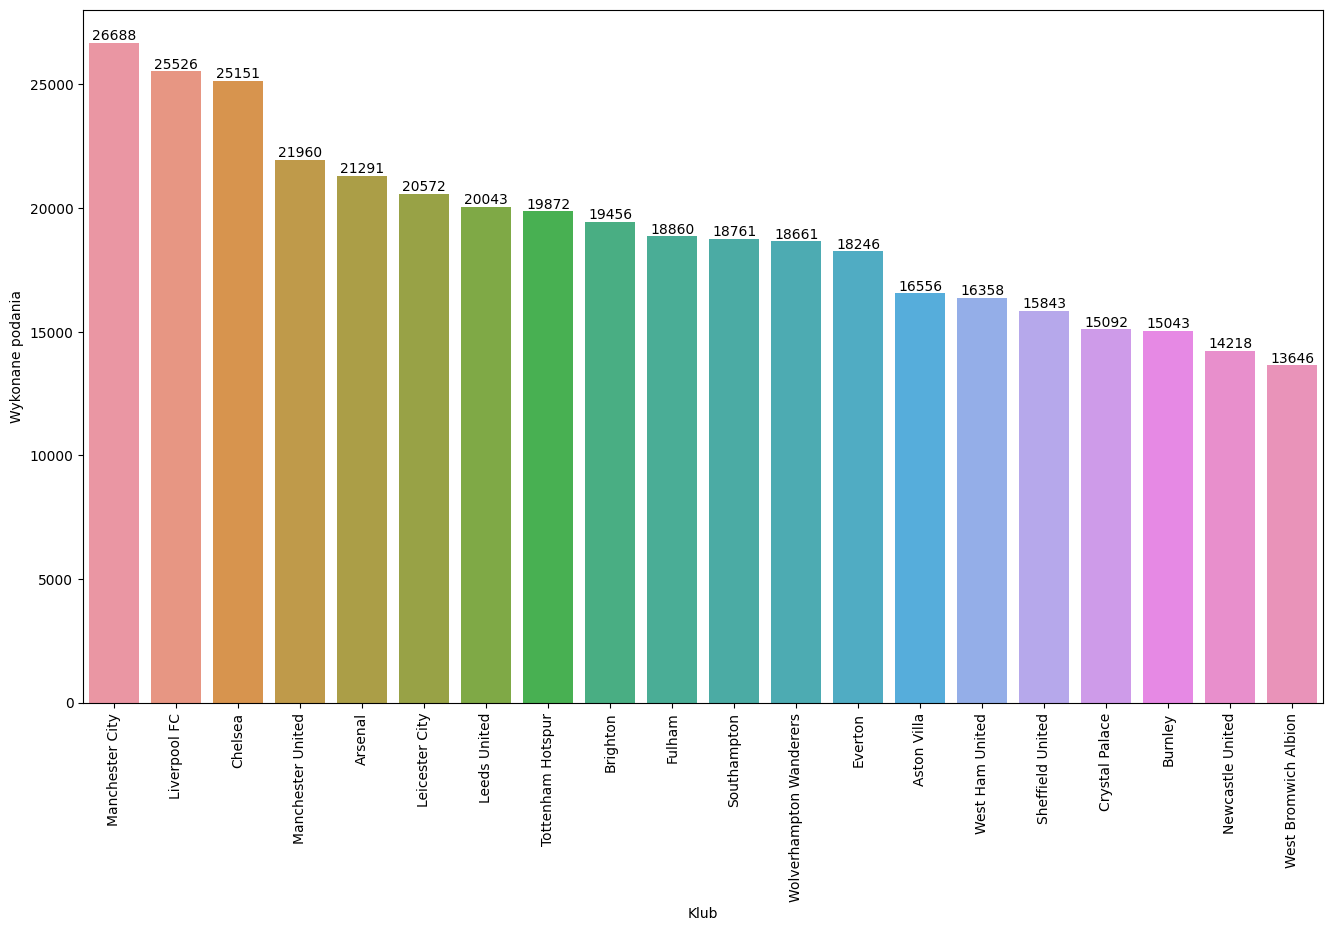

In [12]:
idx = pas.index
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=idx, y='Passes_Attempted', data=pas)
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.xlabel('Klub')
plt.ylabel('Wykonane podania')
plt.show()

# Klubem, który łącznie oddał najwięcej podań, wliczając te dokładne i niedokładne, jest Manchester City (26688 podań). Na podium znajdują się też Liverpool (25526 podań) oraz Chelsea (25151 podań). Klubem, który oddał najmniej podań, jest West Bromich Albion (13646 podań). Róznica pomiędza Manchesterem City, a West Bromich Albion, jest równa 13042 podań.

# 3.Procentowy udział dokładnych podań według klubu

In [13]:
pas_com = pl.groupby('Club').mean()['Perc_Passes_Completed']
pas_com = pas_com.to_frame()
pas_com = pas_com.sort_values(by='Perc_Passes_Completed', ascending=False)
pas_com

/var/folders/fs/1036crms2yncw88yg9r3fpk80000gn/T/ipykernel_11962/2552202812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pas_com = pl.groupby('Club').mean()['Perc_Passes_Completed']


,Perc_Passes_Completed
Club,
Manchester City,86.733333
Chelsea,84.033333
Liverpool FC,83.453571
Fulham,81.710714
Manchester United,81.662069
Wolverhampton Wanderers,81.318519
Arsenal,81.262069
Everton,79.520690
Leeds United,79.382609


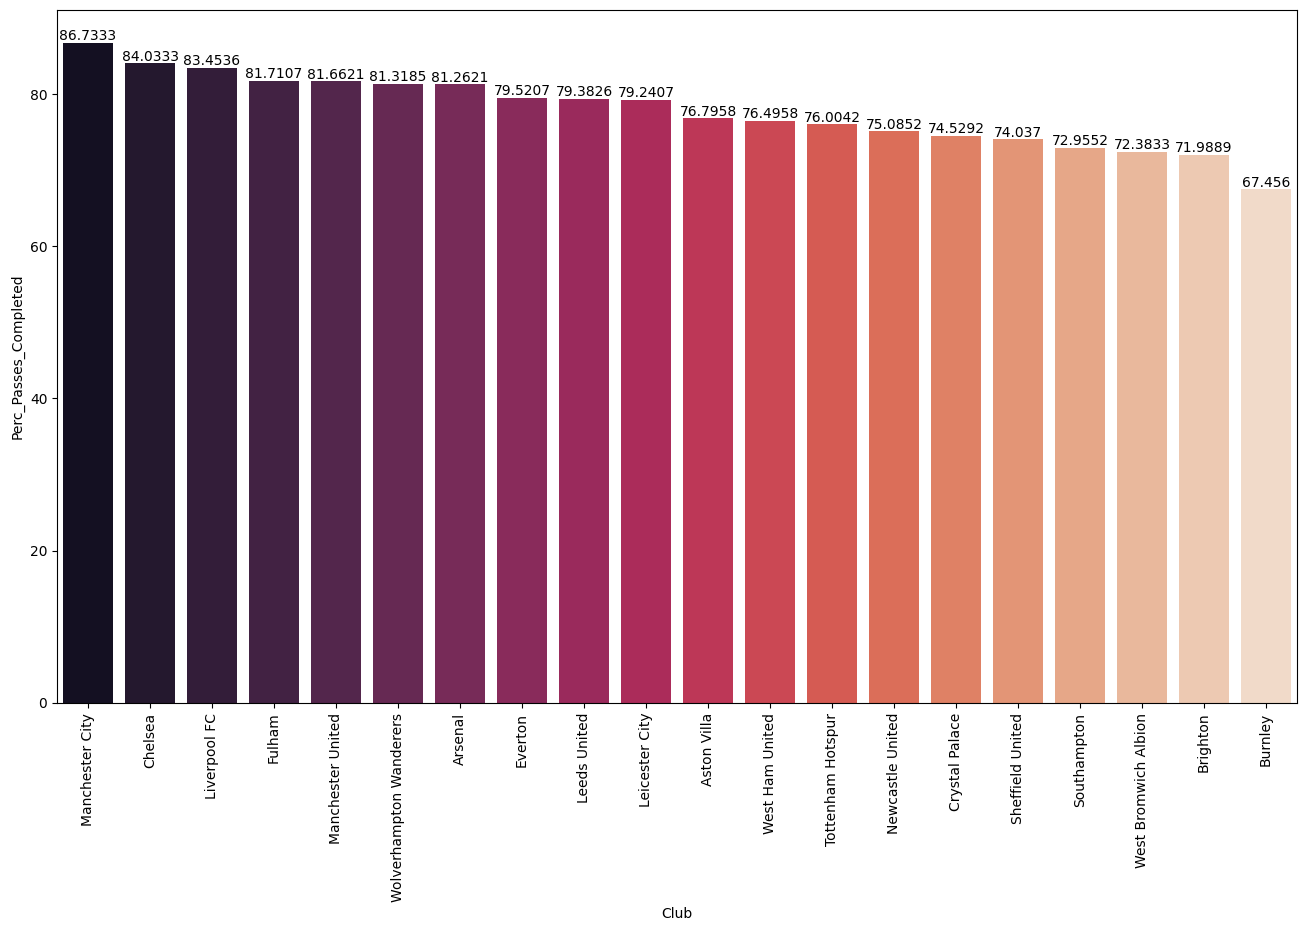

In [14]:
idx = pas_com.index
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=idx, y='Perc_Passes_Completed', data=pas_com, palette='rocket')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.show()

# Klubem, który miał najwyższy procent dokładnych podań, jest również Machester City. Ich dokładność wyniosła prawie 87 procent. Na podium znalazły się równiez Chelsea oraz Liverpool, z dokładnością odpowiednio: 84 procent, 83,4 procent. Klubem, którego dokładność podań jest najniższa, jest Burnley, którego dokładność wyniosła zaledwie około 67,5 procent.

# 4. Piłkarze, którzy wykonali najwięcej podań

In [15]:
players_passes = pl.groupby('Name').sum()['Passes_Attempted']
players_passes = players_passes.to_frame()
players_passes.sort_values(by='Passes_Attempted', ascending=False, inplace=True)
players_passes = players_passes.head(10)
players_passes

/var/folders/fs/1036crms2yncw88yg9r3fpk80000gn/T/ipykernel_11962/2212084972.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  players_passes = pl.groupby('Name').sum()['Passes_Attempted']


,Passes_Attempted
Name,
Andrew Robertson,3214
Trent Alexander-Arnold,2941
Rodri,2728
Pierre Højbjerg,2687
Rúben Dias,2671
Luke Ayling,2661
James Ward-Prowse,2619
Youri Tielemans,2559
Bruno Fernandes,2283


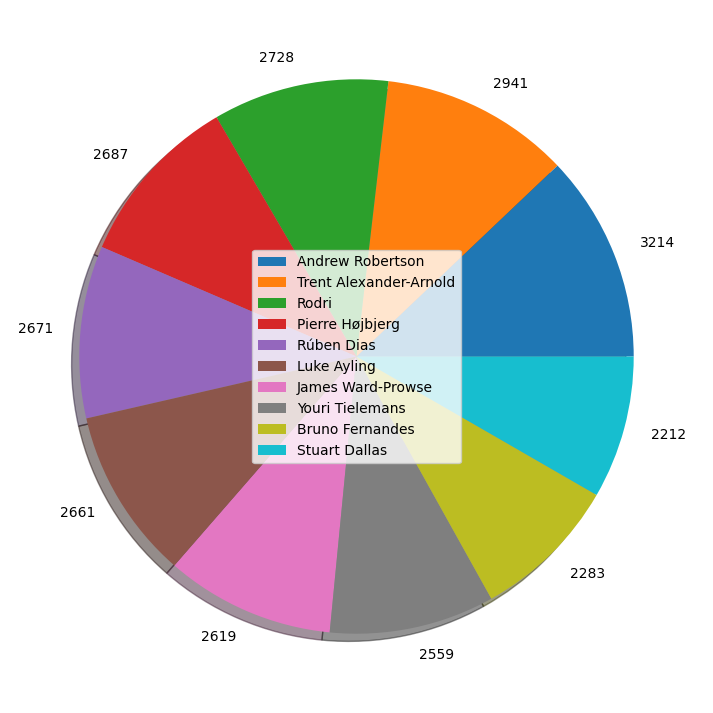

In [45]:
plt.figure(figsize=(16, 9))
plt.pie(players_passes.Passes_Attempted, labels=players_passes.Passes_Attempted, shadow=True)
plt.legend(players_passes.index, loc='center')
plt.show()

# Andrew Robertson jest piłkarzem, który oddał najwięcej podań (3214 podania). Drugim najczęściej podającym piłkarzem jest Trent Alexander-Arnold (2914), a trzecim Rodri (2728).

# 5. Procent grających zawodników, według przedziałów wiekowych: 
    - poniżej 20 lat
    - od 21 do 25
    - od 26 do 30
    - powyżej 30 

In [17]:
under20 = pl[pl['Age'] <= 20 ]
age25_20 = pl[(pl['Age'] > 20) & (pl['Age'] <= 25)]
age25_30 = pl[(pl['Age'] > 25) & (pl['Age'] <= 30)]
Above30 = pl[pl['Age'] > 30]

In [18]:
tab = np.array([under20['Name'].count(), age25_20['Name'].count(), age25_30['Name'].count(),  Above30['Name'].count()])
lab = ['younger than 20', 'between 20 and 25', 'between 25 and 30', 'older than 30']
tab

array([ 78, 186, 197,  71])

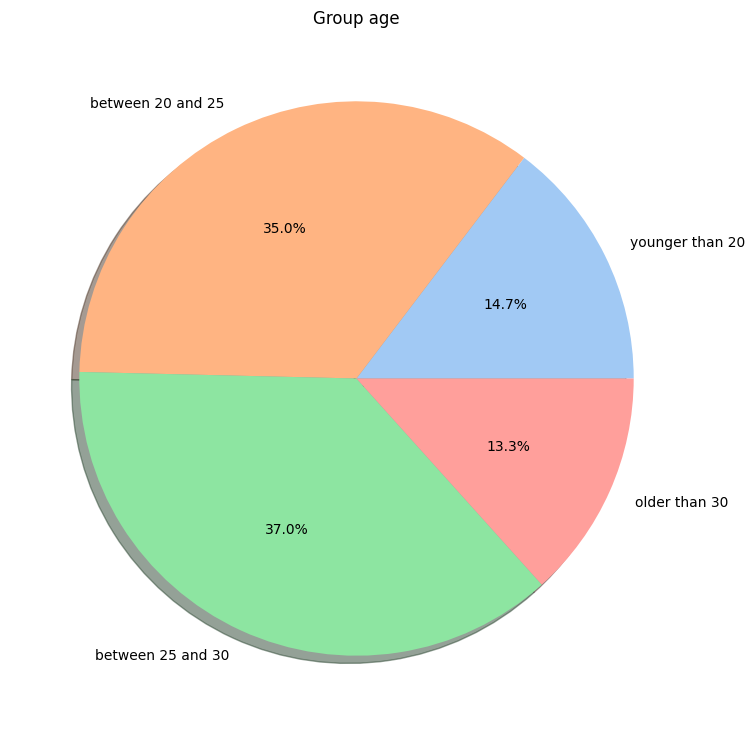

In [19]:
plt.figure(figsize=(16,9))
plt.pie(tab, labels=lab, colors=sns.color_palette('pastel')[0:5], autopct=lambda pct: func(pct), shadow=True)
plt.title('Group age')
plt.show()

# W Premier Leauge w sezonie 2020/2021 najwięcej było zawodników z przedziału od 26 do 30 lat (37 % całości). Drugą najliczniejszą grupą byli zawodnicy w wieku od 21 do 25 lat (35 %). Łącznie stanowią oni prawie 3/4 wszystkich zawodników w lidze. Zawodnicy poniżej 20 lat stanowili 14,7 %, a zawodnicy powyżej 30 lat 13,3%.

# 6. Zawodnicy z największą ilością żółtych kartek oraz ilość czerwonych kartek tych zawodników

In [21]:
yellow = pl[['Name', 'Yellow_Cards']]
yellow.sort_values(by='Yellow_Cards', ascending=False, inplace=True)
yellow = yellow.head(10)
yellow.sort_index(ascending=True, inplace=True)
yellow

/var/folders/fs/1036crms2yncw88yg9r3fpk80000gn/T/ipykernel_11962/412918024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow.sort_values(by='Yellow_Cards', ascending=False, inplace=True)


,Name,Yellow_Cards
53,Harry Maguire,11
159,Pierre Højbjerg,9
218,Kalvin Phillips,10
242,Mason Holgate,9
266,John McGinn,12
270,Douglas Luiz,10
318,Rúben Neves,8
346,Luka Milivojević,8
480,Conor Gallagher,11
514,John Lundstram,8


In [22]:
indexes = [266, 53, 480, 218, 270, 159, 242, 514, 346, 318]
red = pl[pl.index.isin(indexes)]
red = red[['Name','Red_Cards']]
red

,Name,Red_Cards
53,Harry Maguire,0
159,Pierre Højbjerg,0
218,Kalvin Phillips,0
242,Mason Holgate,0
266,John McGinn,0
270,Douglas Luiz,1
318,Rúben Neves,0
346,Luka Milivojević,1
480,Conor Gallagher,0
514,John Lundstram,1


In [23]:
labels = yellow.Name.to_list()
labels

['Harry Maguire',
 'Pierre Højbjerg',
 'Kalvin Phillips',
 'Mason Holgate',
 'John McGinn',
 'Douglas Luiz',
 'Rúben Neves',
 'Luka Milivojević',
 'Conor Gallagher',
 'John Lundstram']

In [24]:
redlist = red.Red_Cards.to_list()
yellowlist = yellow.Yellow_Cards.to_list()
labels = yellow.Name.to_list()

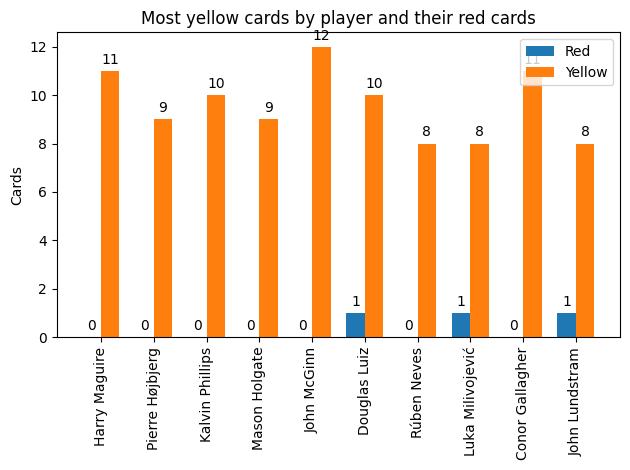

In [47]:
x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, redlist, width, label='Red')
rects2 = ax.bar(x + width/2, yellowlist, width, label='Yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cards')
ax.set_title('Most yellow cards by player and their red cards')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.xticks(rotation='vertical')

fig.tight_layout()

plt.show()

# Trzema najczęsciej kartkującymi zawodnikami w sezonie 2020/2021 są John McGinn, Harry Maguire oraz Conor Gallagher. Pomimo dużej ilości żółtych kartek, nie dostali żadnej czerwonej. Na powyższym rankingu jedynymi zawodnikami, którzy dostali czerwoną kartkę, są Douglas Luiz, Luka Milivojević oraz John Lundstram.

# 7. Porównanie wieku piłkarzy we wszystkich klubach na podstawie wykresu pudełkowego oraz wykresu skrzypcowego

In [26]:
ages = pl[['Club', 'Age']]
ages

,Club,Age
0,Chelsea,21
1,Chelsea,28
2,Chelsea,24
3,Chelsea,23
4,Chelsea,20
...,...,...
527,Sheffield United,24
528,Sheffield United,26
529,Sheffield United,21
530,Sheffield United,16


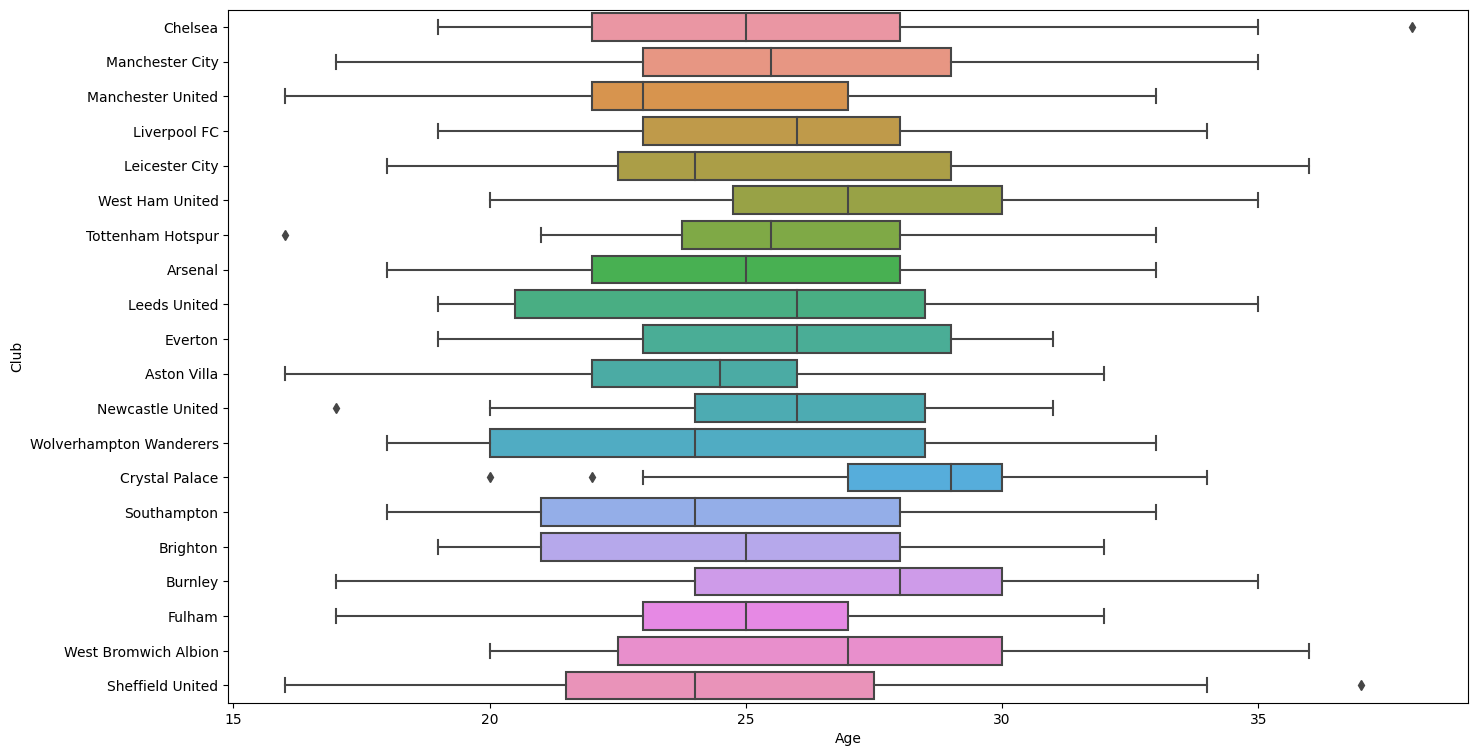

In [27]:
plt.figure(figsize=(16, 9))
sns.boxplot(x="Age", y='Club', data=ages)
plt.show()

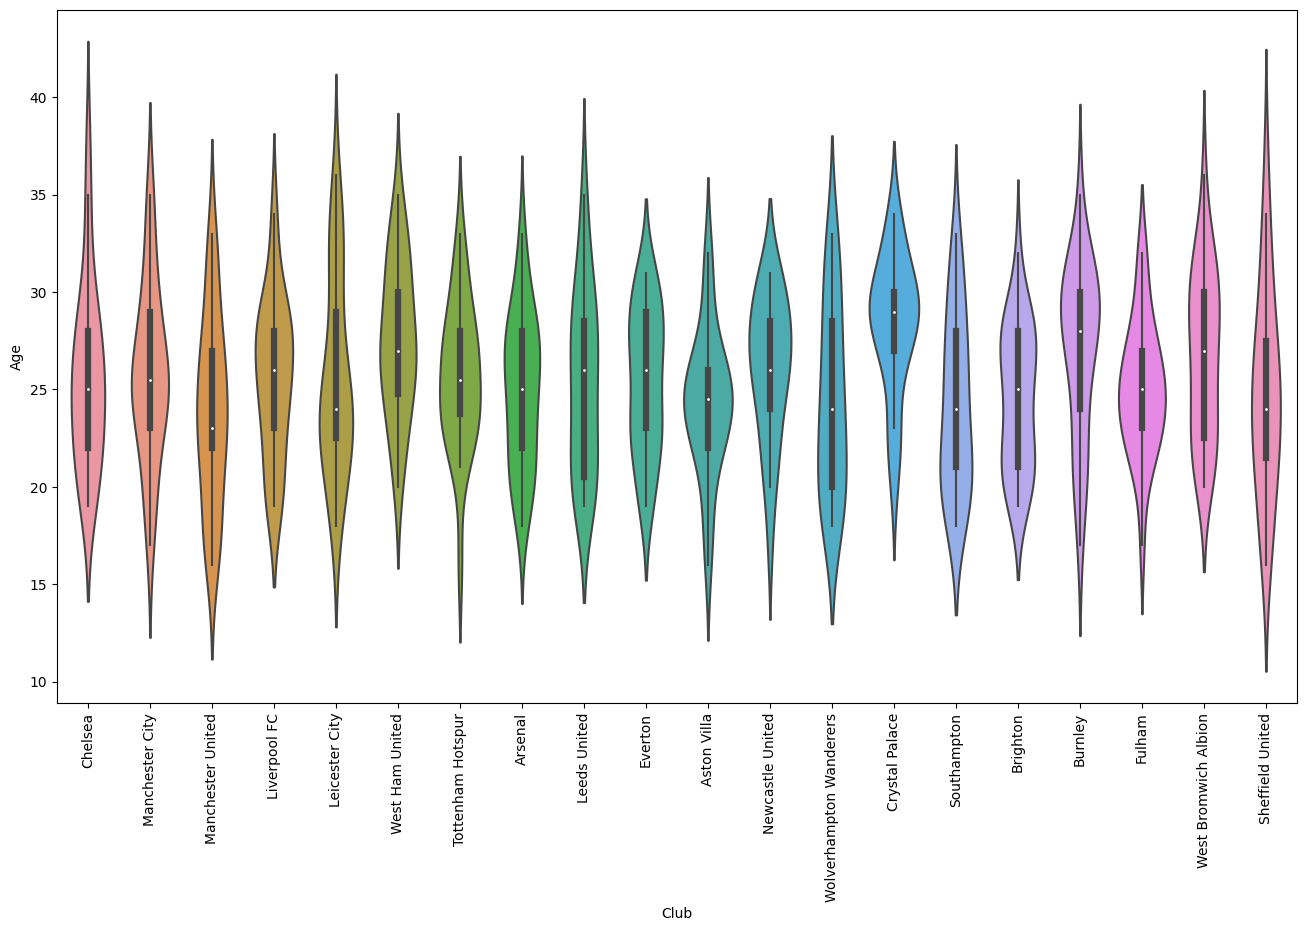

In [28]:
plt.figure(figsize=(16, 9))
sns.violinplot(x="Club", y='Age', data=ages)
plt.xticks(rotation='vertical')
plt.show()

# Klubem z najniższą medianą wieku jest Machester United (około 24). Klubem, w którym ta wartość jest najwyższa, jest Crystal Palace, gdzie mediana wynosi około 29 lat. Najmniejszy Q1 jest w klubach Manchester United, Aston Villa, Sheffield United, gdzie wynosi około 16 lat. Najwyższa wartość Q1 występuje w Crystal Palace i wynosi on około 24 lata. Q3 ma najwyższą wartość w West Bromich Albion oraz Leicester City. W tych klubach wartość ta wynosi około 36 lat. Najniższa wartość Q3 występuje w Newcastle United oraz Evertonie, gdzie wartość wynosi około 31 lat.

# 8. Najcześciej występujący wiek u piłkarzy 

<Figure size 1600x900 with 0 Axes>

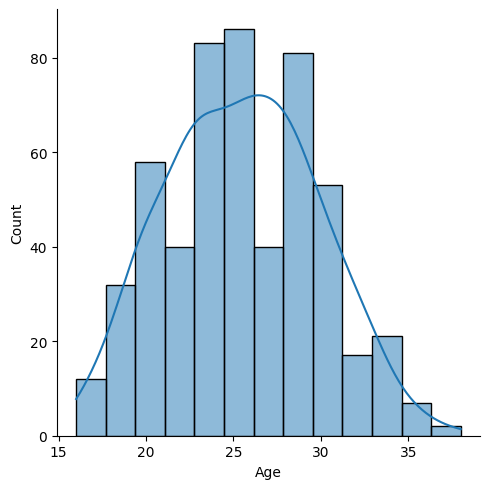

In [29]:
plt.figure(figsize=(16, 9))
sns.displot(data=pl, x='Age', kde=True)
plt.show()

# Najwięcej piłkarzy w sezonie 2020/2021 miało 25 lat. Drugim najczęsciej występującym wiekiem u piłkarza były 24 lata, a trzecim 29 lat.

# 9. Top 20 piłkarzy, którzy zaliczyli łącznie najwięcej goli i asyst

In [30]:
pl['Goals_And_Assists'] = pl.loc[:,['Goals', 'Assists']].sum(axis=1)


In [31]:
top20 = pl[['Name', 'Goals_And_Assists']]
top20.sort_values(by='Goals_And_Assists', ascending=False, inplace=True)
top20 = top20.head(20)
top20

/var/folders/fs/1036crms2yncw88yg9r3fpk80000gn/T/ipykernel_11962/2908367654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top20.sort_values(by='Goals_And_Assists', ascending=False, inplace=True)


,Name,Goals_And_Assists
162,Harry Kane,37
51,Bruno Fernandes,30
81,Mohamed Salah,27
161,Son Heung-min,27
110,Jamie Vardy,24
214,Patrick Bamford,24
54,Marcus Rashford,20
267,Ollie Watkins,19
86,Sadio Mané,18
34,Kevin De Bruyne,18


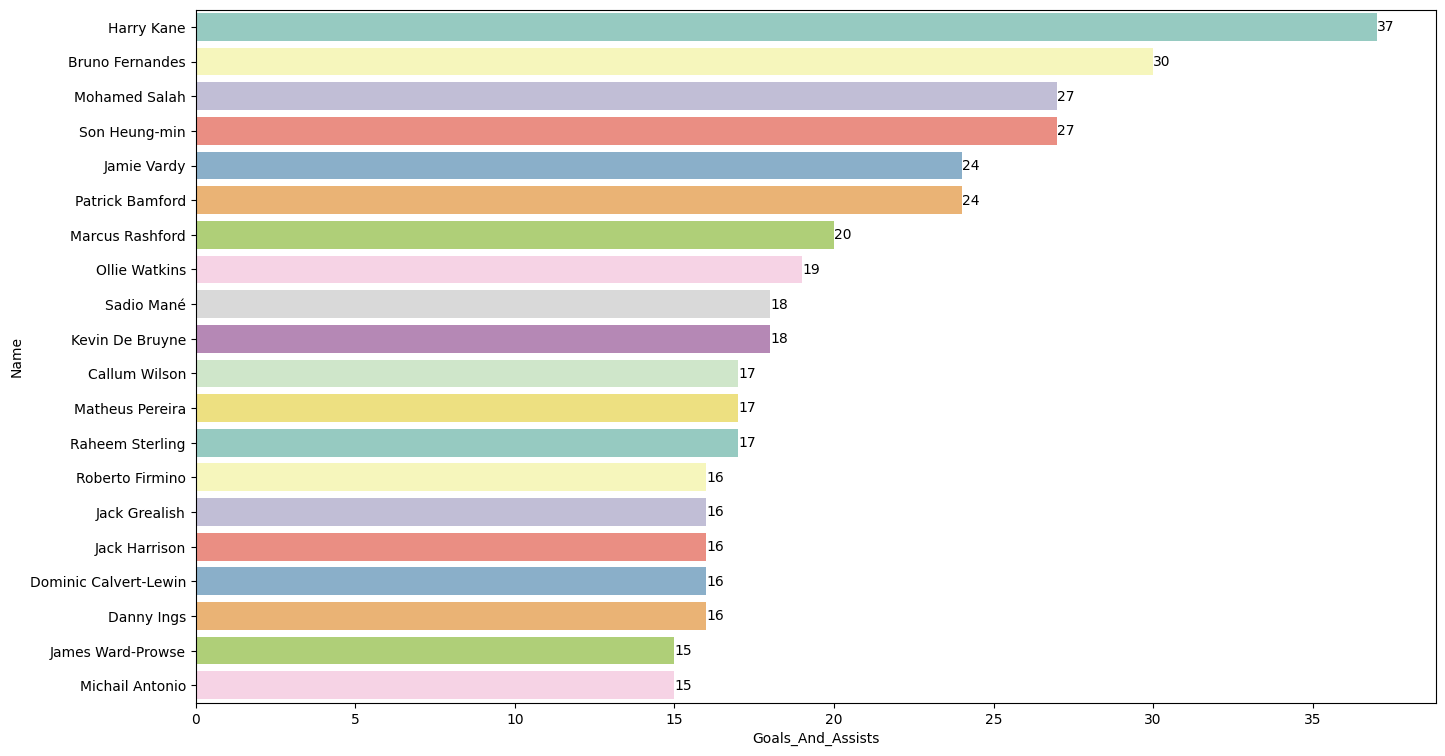

In [32]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x="Goals_And_Assists", y='Name', data=top20, palette='Set3')
ax.bar_label(ax.containers[0])
plt.show()

# W sezonie 2020/2021 piłkarzem, który zaliczył najwięcej goli i asyst, był Harry Kane. Brał on udział łącznie przy 37 bramkach. Na drugim miejscu uplasował się Bruno Fernandes, u którego ta liczba wyniosła 30. Podium zamykają ex aequo Mohamed Salah oraz Heung-min Son, którzy przyczynili się do 27 bramek.

# 10. Piłkarze z najwyższym współczynnikiem bramek na mecz

In [33]:
pl['Goal_Per_Match'] = np.round(np.where(pl['Matches'] > 0, pl['Goals']/pl['Matches'], 0), 1)
pl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Goals_And_Assists,Goal_Per_Match
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,11,0.2
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,0,0.0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,14,0.2
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,8,0.1
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,3,0.0


In [34]:
gpm = pl[['Name', 'Goal_Per_Match']]
gpm.sort_values(by='Goal_Per_Match', ascending=False, inplace=True)
gpm = gpm.head(10)
gpm

/var/folders/fs/1036crms2yncw88yg9r3fpk80000gn/T/ipykernel_11962/3552563472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpm.sort_values(by='Goal_Per_Match', ascending=False, inplace=True)


,Name,Goal_Per_Match
162,Harry Kane,0.7
145,Jesse Lingard,0.6
175,Gareth Bale,0.6
81,Mohamed Salah,0.6
307,Joe Willock,0.6
92,Diogo Jota,0.5
161,Son Heung-min,0.5
33,İlkay Gündoğan,0.5
74,Anthony Elanga,0.5
120,Kelechi Iheanacho,0.5


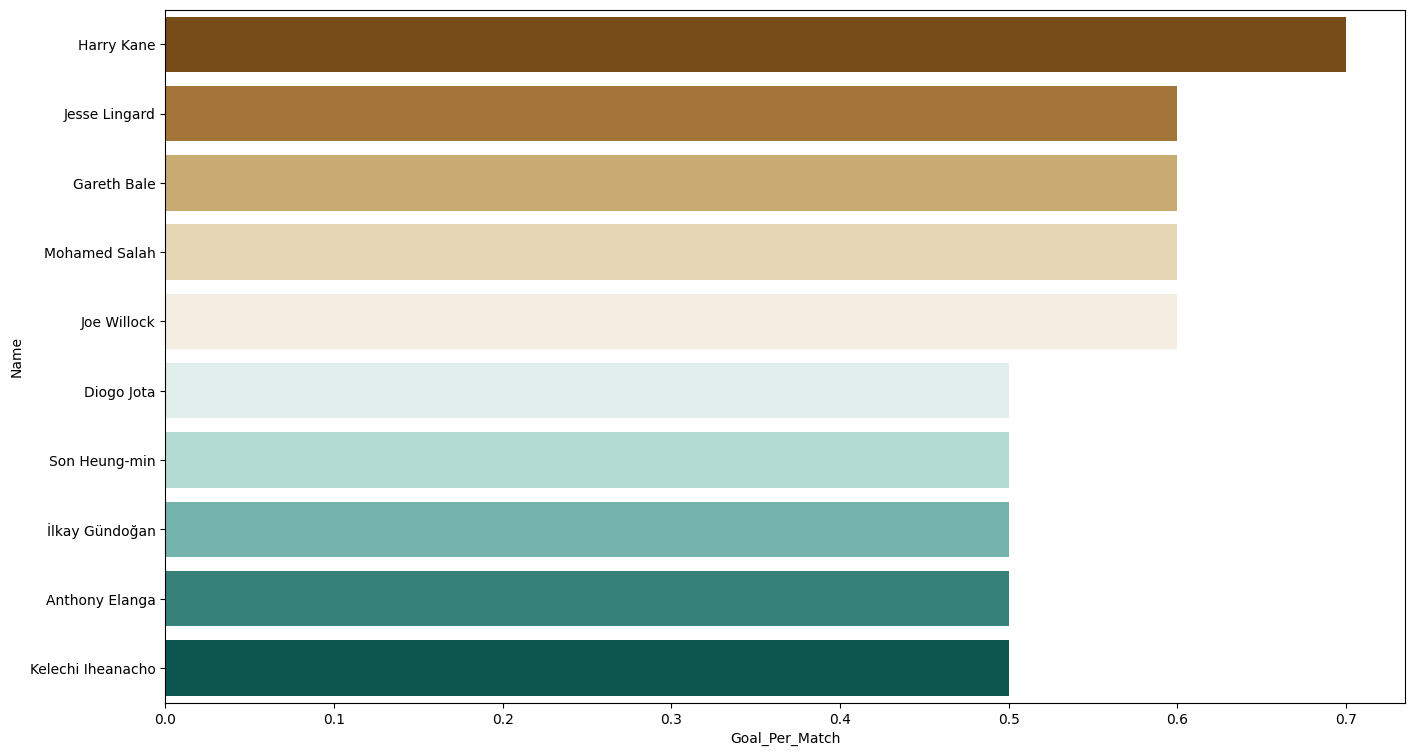

In [35]:
plt.figure(figsize=(16,9))
sns.barplot(x='Goal_Per_Match', y='Name', data=gpm, palette='BrBG')
plt.show()

# Piłkarzem z najwyższym współczynnikiem bramek na mecz ponownie został Harry Kane. Strzelał on średnio 0.7 bramki na mecz. Następnie znaleźli się Jesse Lindgard, Gareth Bale, Mohamed Salah oraz Joe Willock, którzy strzelali średnio 0.6 bramki na mecz. 

# 11. Korelacja pomiędzy wiekiem, ilością meczy, rozegranych meczy od początku, minut na boisku oraz sumą goli i asyst.

In [37]:
cor = pl[['Age', 'Matches', 'Starts', 'Mins', 'Goals_And_Assists']]

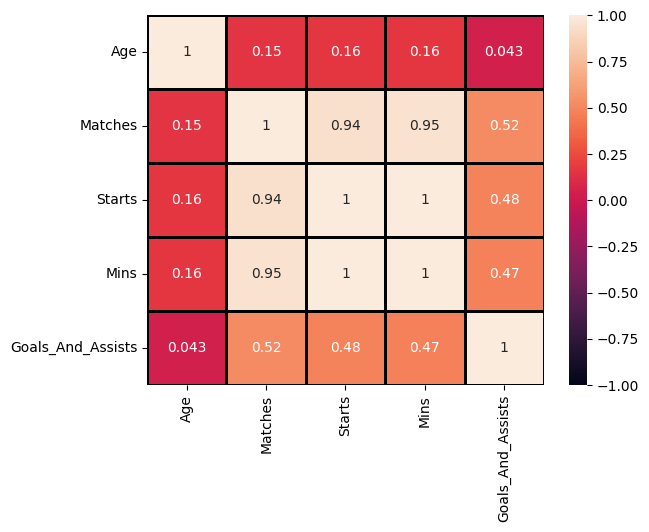

In [38]:
correlation = sns.heatmap(cor.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black')